In [1]:
### 导入依赖 ###
print(__doc__)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Automatically created module for IPython interactive environment


In [2]:
### 利用一个3分类问题，理解Confusion matrix 和 ROC curve #注意 pd.read_csv中sep参数的选择
y_pred = pd.read_csv("y_true.csv")
y_test = pd.read_csv("y_predicted_label.csv")
y_score = pd.read_csv("y_predicted_score.csv")

In [3]:
y_test

,class1 class2 class3
0,0\t0\t1
1,0\t0\t0
2,1\t0\t0
3,0\t0\t1
4,0\t0\t0
5,0\t0\t0
6,1\t0\t0
7,0\t1\t0
8,0\t0\t0
9,0\t0\t0


In [4]:
y_pred

,class1 class2 class3
0,0\t0\t1
1,0\t1\t0
2,1\t0\t0
3,0\t0\t1
4,1\t0\t0
5,0\t0\t1
6,1\t0\t0
7,0\t1\t0
8,0\t1\t0
9,0\t1\t0


In [5]:
y_score

,class1 class2 class3
0,-0.7630113199194422\t-0.36482546672607974\t0.1...
1,-0.20224492828106178\t-0.6314436599429623\t-0....
2,0.11801481298797589\t-0.8026307315547563\t-0.3...
3,-0.9078085547540482\t-0.123954776029162\t0.021...
4,-0.011161920989201046\t-0.2791347463581998\t-0...
5,-0.6048726984511159\t-0.34730508982559305\t-0....
6,0.022834912399187668\t-0.2450646741914646\t-0....
7,-0.6107687645088282\t0.18264917133489333\t-0.5...
8,-0.37572754288995336\t-0.2405951629963921\t-0....
9,-0.47017411074378446\t-0.25745136065542285\t-0...


In [37]:
###定义初始变量，请将fpr tpr rpc auc 定义成 dict型 ###
n_classes = 10
fpr = {}
tpr = {}
roc_auc = {}

In [36]:
# 利用一个简单循环 和 roc_curve 函数roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# 其中 y_true是 样本的真实标签
# y score 是 样本的预测得分
# 提示 利用pandas包 操作时 可以利用 pandas.iloc
for i in range(n_classes):
     #
    roc_auc[i] = auc(fpr[i], tpr[i])

KeyError: 0

In [1]:
##利用循环 打印出上述fpr tpr 生成roc曲线
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(, , color= ,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
########################################
lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'cycle' is not defined

In [20]:
#将 one-hot标签 转化为 list形式的3值标签 pred_class已经给出 请对true_class作出
pred_class= []
for i in range(len(y_pred)):
    if y_pred.iloc[i,0] == 1:
        pred_class.append('label_1')
    if y_pred.iloc[i,1] == 1:
        pred_class.append('label_2')
    if y_pred.iloc[i,2] == 1:
        pred_class.append('label_3')
    if y_pred.iloc[i,0] == y_pred.iloc[i,1] == y_pred.iloc[i,2] == 0:
        pred_class.append('no_class')  ..
pred_class

true_class= []
for i in range(len(y_test)):



Text(0.5, 15.0, 'Predicted label')

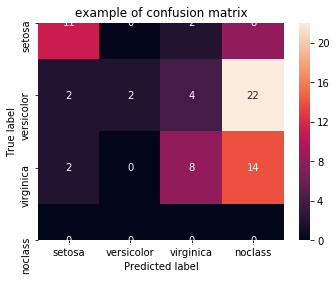

In [21]:
##利用confusion_matrix函数 生成混淆矩阵 confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]¶
cm = confusion_matrix()
cm_df = pd.DataFrame(cm,
                     index = ['label_1','label_2','label_3','noclass'],
                     columns = ['label_1','label_2','label_3','noclass'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('example of confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
### 问题
### 上图中应该如何计算 TP TN FP FN